- [x] Analyze the age distribution of customers, and identify any trends or patterns in spending behavior, credit limit, and utilization ratio across different age groups.
- [x] Explore differences in spending patterns, credit limits, and utilization ratios between male and female customers.
- [x] Investigate if the number of dependents influences spending behavior, credit limit, and utilization ratio.
- [ ] Determine if there's a relationship between customers' education levels and their spending behavior, credit limit, and utilization ratio.
- [ ] Assess if marital status has an impact on spending patterns, credit limits, and utilization ratios.
- [ ] Examine how income levels affect spending behavior, credit limit, and utilization ratio.
- [ ] Investigate if card types are associated with specific demographic segments, and how they may influence spending behavior, credit limit, and utilization ratio.

Consider visualizations such as bar charts, pie charts, or histograms to present the data and reveal trends within each demographic segment.


In [1]:
import sys
!conda install --yes --quiet --prefix {sys.prefix} \
numpy \
pandas \
matplotlib \
seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/eli/anaconda3/envs/data-analysis

  added / updated specs:
    - matplotlib
    - numpy
    - pandas
    - seaborn


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2023.5.7~ --> pkgs/main::ca-certificates-2023.01.10-hca03da5_0 
  certifi            conda-forge/noarch::certifi-2023.5.7-~ --> pkgs/main/osx-arm64::certifi-2022.12.7-py39hca03da5_0 


Preparing transaction: ...working... done
Verifying transaction: ...working... WARNING conda.core.path_actions:verify(1093): Unable to create environments file. Path not writable.
  environment location: /Users/eli/.conda/environments.txt

done
Executing transaction: ...working... WARNING conda.core.envs_manager:register_env(49): Unable to register environment. Path not writable or missing.
  environment location: /Users/eli/anaconda3/envs/data-analysis
  registry file: /Users/e

In [2]:
# !conda install --yes -c conda-forge jupyter_contrib_nbextensions

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Plotting functions

In [61]:
fig_size = lambda param: param if param else (4, 2)

def scatterplot(df, x, y, size=None):
    plt.figure(figsize=fig_size(size))
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(f'{x} vs. {y}')
    plt.show()
    
def boxplot(df, x, y, size=None):
    plt.figure(figsize=fig_size(size))
    sns.boxplot(x=x, y=y, data=df)
    plt.title(f'{y} by {x}')
    plt.show()

def histplot(df, x, hue=None, size=None):
    plt.figure(figsize=fig_size(size))
    sns.histplot(data=df, x=x, hue=hue, element='step', fill=True)
    plt.title(f'Histogram of {x}')
    plt.xlabel(x)
    plt.ylabel('Num of samples')
    plt.show()

def density_plot(df, x, hue=None, size=None):
    plt.figure(figsize=fig_size(size))
    sns.kdeplot(data=df, x=x, hue=hue, shade=True, alpha=0.8)
    plt.title(f'Distribution of {x} by {hue}')
    plt.xlabel(x)
    plt.ylabel('Density')
    plt.show()
    
def pie_chart(data, labels, size=None):
    plt.figure(figsize=fig_size(size))
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.show()

## Assumptions

Certain parts of the data or given feature descriptions might be vague, that's why it is necessary to clarify them. Since this is a non-commercial project, I will make assumptions I will base my the analysis upon. In comemrcial environment those will be clarified by an SME or a business.

# Data Exploration

In [62]:
# load the dataset (download it beforehand)
df = pd.read_csv('./data/BankChurners.csv')

In [63]:
# standardize column names & remove unnecessary columns
column_renames = {
    'CLIENTNUM': 'client_id',
    'Attrition_Flag': 'churn_status',
    'Customer_Age': 'age',
    'Gender': 'gender',
    'Dependent_count': 'dependents',
    'Education_Level': 'education_level',
    'Marital_Status': 'marital_status',
    'Income_Category': 'income_category',
    'Card_Category': 'card_category',
    'Months_on_book': 'months_on_book',
    'Total_Relationship_Count': 'total_relationships',
    'Months_Inactive_12_mon': 'months_inactive',
    'Contacts_Count_12_mon': 'contacts',
    'Credit_Limit': 'credit_limit',
    'Total_Revolving_Bal': 'revolving_balance',
    'Avg_Open_To_Buy': 'available_credit',
    'Total_Amt_Chng_Q4_Q1': 'change_in_purchase_amt',
    'Total_Trans_Amt': 'total_purchase_amt',
    'Total_Trans_Ct': 'total_purchase_ct',
    'Total_Ct_Chng_Q4_Q1': 'change_in_purchase_ct',
    'Avg_Utilization_Ratio': 'credit_utilization',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'naive_bayes_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'naive_bayes_2'
}

needed_columns = ['age', 'gender', 'credit_limit', 'total_purchase_amt', 'credit_utilization', 'dependents']

df = df.rename(columns=column_renames)
df = df[needed_columns]
df.columns

Index(['age', 'gender', 'credit_limit', 'total_purchase_amt',
       'credit_utilization', 'dependents'],
      dtype='object')

## 1 Age Feature

### 1.1 Objectives: 

(1.2) Analyze the age distribution of customers, \
(1.3) and identify any trends or patterns in: \
(1.3.1) spending behavior \
(1.3.2) credit limit \
(1.3.3) utilization ratio across different age groups

In [7]:
print("Min age: ", df['age'].min())
print("Max age: ", df['age'].max())

Min age:  26
Max age:  73


In [84]:
# age groups are defined by [min_age, start_middle_age, start_retirement_age, max_age]
bins = [26, 35, 60, 73]
labels = ['26-35', '36-60', '60-73']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

### 1.2 Analyze Age Distribution

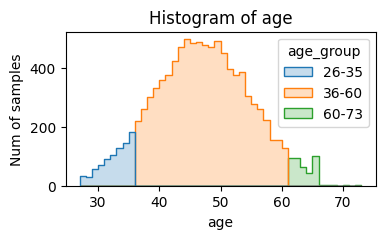

In [9]:
# plot the age distribution using histogram for distinct values
# apply age_group hue (semantic segmentation) onto the histogram
histplot(df=df, x='age', hue='age_group')

In [10]:
df['age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: age, dtype: float64

### 1.3 Trends & Patterns

#### 1.3.1 Spending Behavior

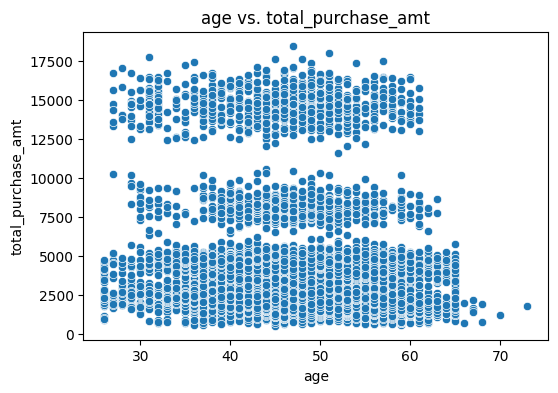

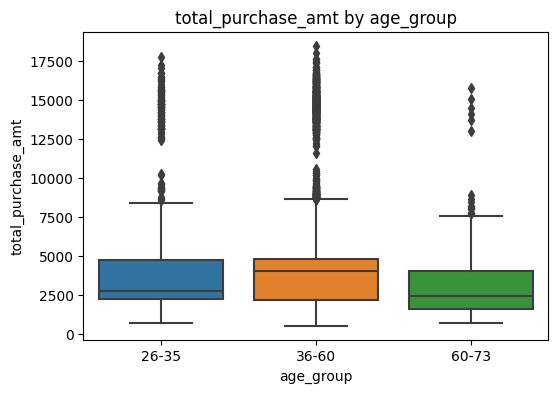

In [11]:
# density_plot(df=df, x='total_purchase_amt', hue='age_group')

# scatter plot: correlation between age and spending behavior
scatterplot(x='age', y='total_purchase_amt', df=df, size=(6, 4))

# Boxplot: outliers or significant differences in spending behavior between age groups
boxplot(x='age_group', y='total_purchase_amt', df=df, size=(6, 4))

#### 1.3.2 Credit Limit

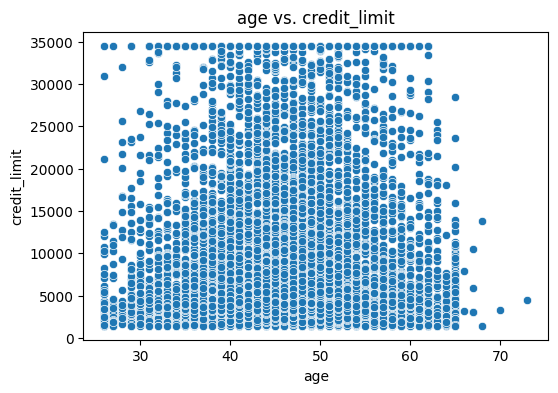

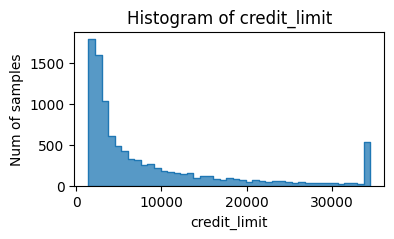

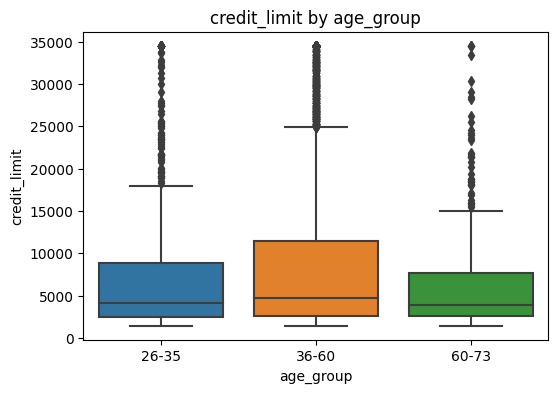

In [12]:
# correlation between age and credit_limit
scatterplot(x='age', y='credit_limit', df=df, size=(6, 4))

# distribution of credit limits across all customers
histplot(df=df, x='credit_limit')

# outliers or significant differences in credit limit between age groups
# use df.loc[df['credit_limit'] < X] to slice the data, where X is the cut-off
boxplot(df=df, x='age_group', y='credit_limit', size=(6, 4))

#### 1.3.3 Utilization Ratio

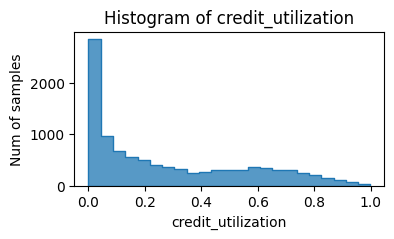

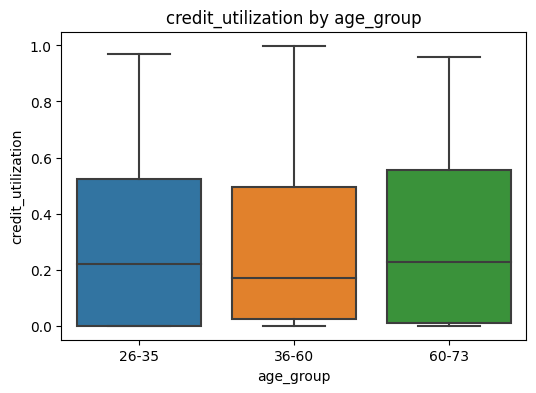

In [13]:
# correlation between age and credit_limit
# scatterplot(x='age', y='credit_utilization', df=df, size=(12, 8))

# distribution of credit limits across all customers
histplot(df=df, x='credit_utilization')

# outliers or significant differences in credit limit between age groups
# use df.loc[df['credit_limit'] < X] to slice the data, where X is the cut-off
boxplot(df=df, x='age_group', y='credit_utilization', size=(6, 4))

### 1.4 Early Insights

#### 1.4.1 Total Spending Amount

1. Correlation between age and spending behavior creates 3 dense clusters.
2. 2 upper clusters along the Y axes are the outliers.

TODO:
1. [ ] Examine other features: Check if there are other features that may explain the clustering, such as income, customer segment, or product preferences.

2. [ ] Use clustering algorithms: Apply unsupervised learning techniques (e.g., k-means, hierarchical clustering) to find patterns or segment the data.

3. [ ] Analyze clusters: Profile each cluster based on demographic, behavioral, or other relevant features to understand their characteristics.


## 2 Gender Feature

### 2.1 Objectives
(2.2) Explore differences in: \
(2.2.1)spending patterns \
(2.2.2) credit limits \
(2.2.3) and utilization ratios between male and female customers

### 2.2 Differences

In [36]:
# Filter the data to include only male and female customers
print("Genders: ", list(df['gender'].unique()))
male_df = df[df['gender'] == 'M']
female_df = df[df['gender'] == 'F']

# Compare spending patterns between male and female customers
male_spending = male_df['total_purchase_amt']
female_spending = female_df['total_purchase_amt']

print("-"*40)
print('Male (M) spending stats:\n', male_spending.describe())
print("-"*40)
print('Female (F) spending stats:\n', female_spending.describe())
print("-"*40)

Genders:  ['M', 'F']
----------------------------------------
Male (M) spending stats:
 count     4769.000000
mean      4493.706228
std       3835.315345
min        530.000000
25%       1881.000000
50%       3513.000000
75%       4711.000000
max      18484.000000
Name: total_purchase_amt, dtype: float64
----------------------------------------
Female (F) spending stats:
 count     5358.000000
mean      4324.318216
std       2951.002887
min        510.000000
25%       2424.250000
50%       4134.000000
75%       4751.750000
max      17437.000000
Name: total_purchase_amt, dtype: float64
----------------------------------------


#### 2.2.1 Spending Patterns

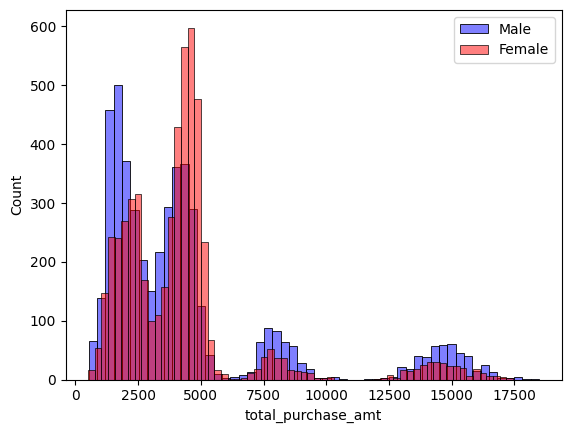

In [93]:
sns.histplot(data=male_df, x='total_purchase_amt', color='blue', alpha=0.5, label='Male')
sns.histplot(data=female_df, x='total_purchase_amt', color='red', alpha=0.5, label='Female')
plt.legend()
plt.show()

#### 2.2.2 Credit Limits

In [16]:
male_credit_limit = male_df['credit_limit']
female_credit_limit = female_df['credit_limit']

print('Male credit limit stats:\n', male_credit_limit.describe())
print('Female credit limit stats:\n', female_credit_limit.describe())

Male credit limit stats:
 count     4769.000000
mean     12685.674963
std      10647.936985
min       1438.300000
25%       3805.000000
50%       8902.000000
75%      19040.000000
max      34516.000000
Name: credit_limit, dtype: float64
Female credit limit stats:
 count     5358.000000
mean      5023.854274
std       5251.881090
min       1438.300000
25%       2160.000000
50%       3048.000000
75%       5638.500000
max      34516.000000
Name: credit_limit, dtype: float64


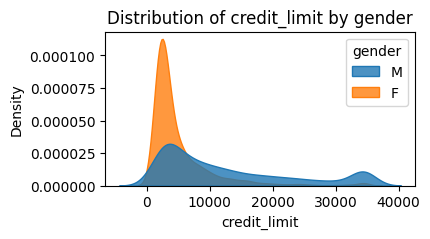

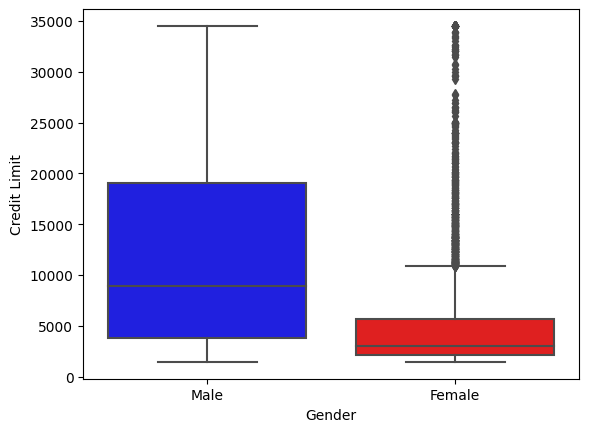

In [94]:
density_plot(df=df, x='credit_limit', hue='gender')

sns.boxplot(data=[male_credit_limit, female_credit_limit], palette=['blue', 'red'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Credit Limit')
plt.show()

#### 2.2.2 Utilization ratios

In [95]:
male_utilization = male_df['credit_utilization']
female_utilization = female_df['credit_utilization']

print("-"*40)
print('Male utilization stats:\n', male_utilization.describe())
print("-"*40)
print('Female utilization stats:\n', female_utilization.describe())
print("-"*40)

----------------------------------------
Male utilization stats:
 count    4769.000000
mean        0.199548
std         0.232450
min         0.000000
25%         0.027000
50%         0.100000
75%         0.297000
max         0.994000
Name: credit_utilization, dtype: float64
----------------------------------------
Female utilization stats:
 count    5358.000000
mean        0.341957
std         0.293300
min         0.000000
25%         0.000000
50%         0.304000
75%         0.602000
max         0.999000
Name: credit_utilization, dtype: float64
----------------------------------------


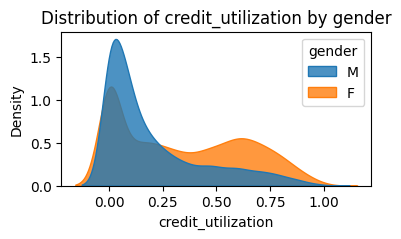

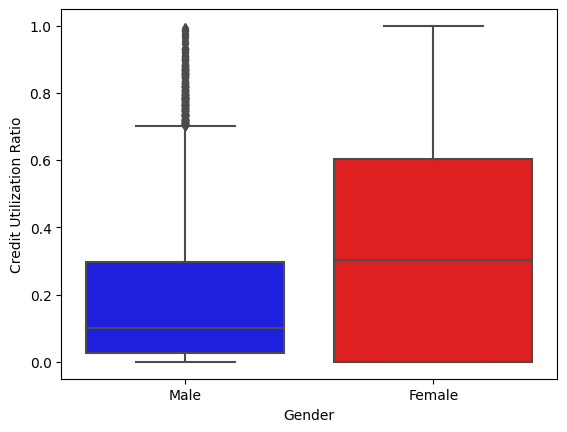

In [58]:
density_plot(df=df, x='credit_utilization', hue='gender')

sns.boxplot(data=[male_utilization, female_utilization], palette=['blue', 'red'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Credit Utilization Ratio')
plt.show()

### 2.3 Early insights

1. Most men's total spendings peak between 0 and 5000, which is twice as much as women's are.
2. Fewer men's total spendings peak between 7000 and 9000, and between 12500 and 17000, which is twice as much as women's are.

3. Most women have their credit limit set between 0 and 10000.
4. Women have many outliers.
5. Men's credit limits greatly vary from 0 up to about 35000, with 5000 and 35000 being two slight peaks. 
6. Men don't have outliers.

7. Women tend to spend more from their credit limit than men. Could be because most women have lower credit limits, while they spend around the same amout of money than men do. That could explain lower credit utilization by men, since men have more yet to be utilized.


##  3 Number of dependents

### 3.1 Objectives
Investigate if the number of dependents influences: \
(3.2) spending behavior \
(3.3) credit limit \ 
(3.4) utilization ratio

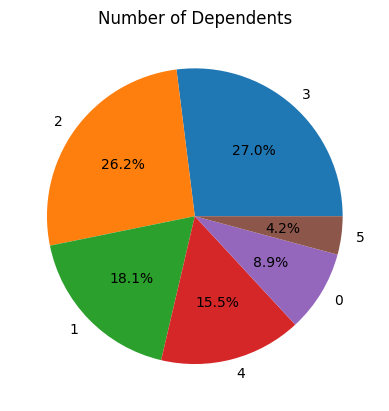

In [91]:
dep_counts = df['dependents'].value_counts()
plt.pie(dep_counts, labels=dep_counts.index, autopct='%1.1f%%')
plt.title('Number of Dependents')
plt.show()

### 3.2 Spending Behavior

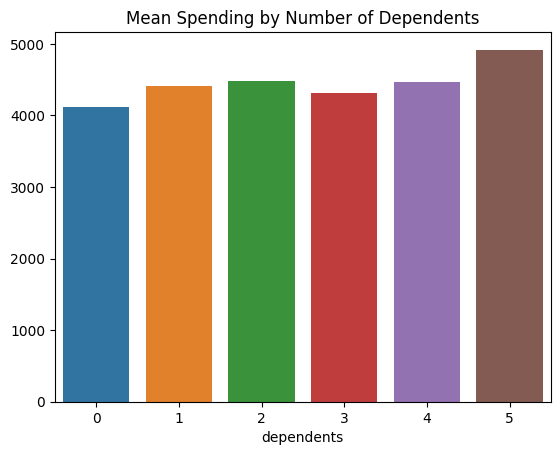

In [89]:
# Analyze spending behavior
spending_behavior = df.groupby('dependents')['total_purchase_amt'].mean()
sns.barplot(x=spending_behavior.index, y=spending_behavior.values)
plt.title('Mean Spending by Number of Dependents')
plt.show()


# # Investigate number of dependents vs credit limit
# sns.boxplot(data=df, x='dependents', y='total_purchase_amt')
# plt.title('Dependents vs Spending Amount')
# plt.xlabel('Number of Dependents')
# plt.ylabel('Spending Amount')
# plt.show()

### 3.3 Credit Limit

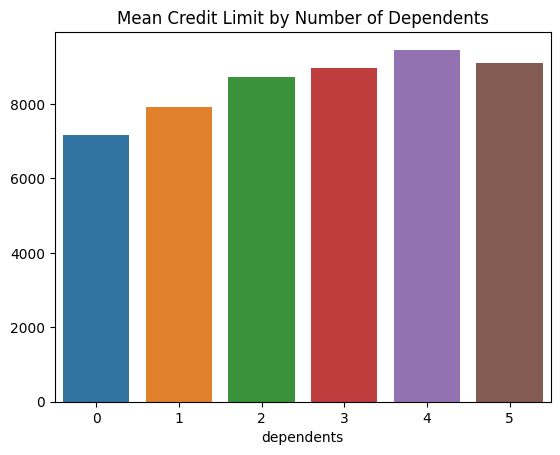

In [86]:
# Analyze credit limit
credit_limit = df.groupby('dependents')['credit_limit'].mean()
sns.barplot(x=credit_limit.index, y=credit_limit.values)
plt.title('Mean Credit Limit by Number of Dependents')
plt.show()


# # Investigate number of dependents vs credit limit
# sns.boxplot(data=df, x='dependents', y='credit_limit')
# plt.title('Dependents vs Credit Limit')
# plt.xlabel('Number of Dependents')
# plt.ylabel('Credit Limit')
# plt.show()

### 3.4 Utilization Ratio

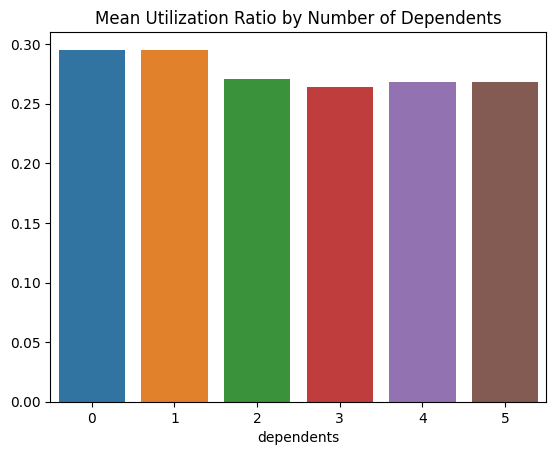

In [92]:
# Analyze utilization ratio

utilization_ratio = df.groupby('dependents')['credit_utilization'].mean()
sns.barplot(x=utilization_ratio.index, y=utilization_ratio.values)
plt.title('Mean Utilization Ratio by Number of Dependents')
plt.show()

# # Investigate number of dependents vs utilization ratio
# sns.lineplot(data=df, x='dependents', y='credit_utilization')
# plt.title('Dependents vs Utilization Ratio')
# plt.xlabel('Number of Dependents')
# plt.ylabel('Utilization Ratio')
# plt.show()

### 3.5 Early insights

1. 0-2 dependends: ↗️ upward mean spending trend
2. 3-4 dependents: ↘️ downward mean spending trend
3. 5 dependents: mean spending trend suddenly ⬆️ goes up after 4 and is  the highest mean spending

4. 0-4 dependents: ↗️ slightly upward mean credit limit trend
5. 0-5 dependents: credit limit suddenly ⬇️ goes down at 5

6. 0-1 dependents: ↔️ credit utilization ratio is the same
7. 2-3 dependents: ↘️ credit limit utilization ratio has a downward trend
8. 4-5 dependents: credit limit utilization ration ⬆️ goes up at 4 and keeps ↔️ the same mean at 5